In [2]:
# Breast Cancer Classification using Feedforward Neural Network
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


2025-09-04 10:55:22.438625: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-04 10:55:22.438907: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-04 10:55:22.474894: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-04 10:55:23.437726: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [4]:
print("=== Breast Cancer Classification with Neural Networks ===\n")

# 1. LOAD THE DATASET
# ===================
print("1. Loading the Breast Cancer dataset...")
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (0: malignant, 1: benign)

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target classes: {data.target_names}")
print(f"Class distribution: {np.bincount(y)}")
print("Explanation: We loaded the breast cancer dataset which contains 30 features")
print("extracted from digitized images of breast mass. The target is binary:")
print("0 = malignant, 1 = benign\n")

=== Breast Cancer Classification with Neural Networks ===

1. Loading the Breast Cancer dataset...
Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Target classes: ['malignant' 'benign']
Class distribution: [212 357]
Explanation: We loaded the breast cancer dataset which contains 30 features
extracted from digitized images of breast mass. The target is binary:
0 = malignant, 1 = benign



2. Basic dataset exploration...

Dataset Info:
Missing values: 0
Feature statistics:
       mean radius  mean texture  mean perimeter    mean area  mean smoothness
count   569.000000    569.000000      569.000000   569.000000       569.000000
mean     14.127292     19.289649       91.969033   654.889104         0.096360
std       3.524049      4.301036       24.298981   351.914129         0.014064
min       6.981000      9.710000       43.790000   143.500000         0.052630
25%      11.700000     16.170000       75.170000   420.300000         0.086370
50%      13.370000     18.840000       86.240000   551.100000         0.095870
75%      15.780000     21.800000      104.100000   782.700000         0.105300
max      28.110000     39.280000      188.500000  2501.000000         0.163400


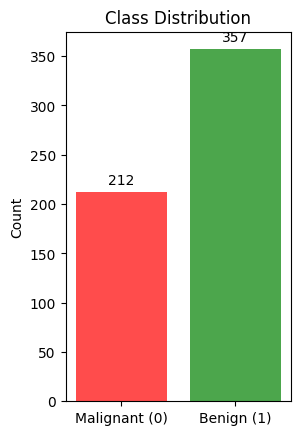

In [11]:
# 2. EXPLORATORY DATA ANALYSIS
# ============================
print("2. Basic dataset exploration...")
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print("\nDataset Info:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Feature statistics:")
print(df.describe().iloc[:, :5])  # Show first 5 features

# Visualize feature distributions for a few key features
plt.subplot(1, 2, 1)
class_counts = np.bincount(y)
plt.bar(['Malignant (0)', 'Benign (1)'], class_counts, color=['red', 'green'], alpha=0.7)
plt.title('Class Distribution')
plt.ylabel('Count')
for i, count in enumerate(class_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')
plt.show()

In [6]:
# 3. DATA PREPROCESSING
# =====================
print("\n3. Preprocessing the data...")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print("Explanation: We split data 80/20 to have separate sets for training and")
print("unbiased evaluation. Stratify ensures equal class proportions in both sets.\n")

# Feature scaling/normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling applied using StandardScaler")
print("Before scaling - Training data stats:")
print(f"Mean: {X_train.mean():.2f}, Std: {X_train.std():.2f}")
print("After scaling - Training data stats:")
print(f"Mean: {X_train_scaled.mean():.2f}, Std: {X_train_scaled.std():.2f}")
print("Explanation: StandardScaler normalizes features to have mean=0 and std=1.")
print("This is crucial for neural networks as it prevents features with larger")
print("scales from dominating the learning process.\n")


3. Preprocessing the data...
Training set size: (455, 30)
Test set size: (114, 30)
Explanation: We split data 80/20 to have separate sets for training and
unbiased evaluation. Stratify ensures equal class proportions in both sets.

Feature scaling applied using StandardScaler
Before scaling - Training data stats:
Mean: 61.21, Std: 224.61
After scaling - Training data stats:
Mean: -0.00, Std: 1.00
Explanation: StandardScaler normalizes features to have mean=0 and std=1.
This is crucial for neural networks as it prevents features with larger
scales from dominating the learning process.



In [7]:
# 4. BUILD THE NEURAL NETWORK
# ============================
print("4. Building the feedforward neural network...")

model = keras.Sequential([
    # Input layer - specify input shape
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),  # Regularization to prevent overfitting
    
    # First hidden layer
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    
    # Second hidden layer  
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    
    # Output layer for binary classification
    layers.Dense(1, activation='sigmoid')
])

# Display model architecture
model.summary()

print("\nModel Architecture Explanation:")
print("- Input layer: 30 neurons (one for each feature)")
print("- Hidden layer 1: 64 neurons with ReLU activation")
print("- Hidden layer 2: 32 neurons with ReLU activation") 
print("- Hidden layer 3: 16 neurons with ReLU activation")
print("- Output layer: 1 neuron with sigmoid activation (binary classification)")
print("- Dropout layers: Randomly set some neurons to 0 during training to prevent overfitting")
print("- ReLU activation: f(x) = max(0, x) - introduces non-linearity")
print("- Sigmoid activation: f(x) = 1/(1 + e^(-x)) - outputs probability between 0 and 1\n")


4. Building the feedforward neural network...


2025-09-03 13:42:54.091169: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)


Model Architecture Explanation:
- Input layer: 30 neurons (one for each feature)
- Hidden layer 1: 64 neurons with ReLU activation
- Hidden layer 2: 32 neurons with ReLU activation
- Hidden layer 3: 16 neurons with ReLU activation
- Output layer: 1 neuron with sigmoid activation (binary classification)
- Dropout layers: Randomly set some neurons to 0 during training to prevent overfitting
- ReLU activation: f(x) = max(0, x) - introduces non-linearity
- Sigmoid activation: f(x) = 1/(1 + e^(-x)) - outputs probability between 0 and 1



In [8]:
# 5. COMPILE THE MODEL
# ====================
print("5. Compiling the model...")
model.compile(
    optimizer='adam',           # Adaptive learning rate optimizer
    loss='binary_crossentropy', # Appropriate for binary classification
    metrics=['accuracy']        # Track accuracy during training
)

print("Optimizer: Adam - adaptive learning rate, momentum-based")
print("Loss function: Binary crossentropy - measures difference between predicted")
print("probabilities and actual binary labels")
print("Metrics: Accuracy - fraction of correct predictions\n")


5. Compiling the model...
Optimizer: Adam - adaptive learning rate, momentum-based
Loss function: Binary crossentropy - measures difference between predicted
probabilities and actual binary labels
Metrics: Accuracy - fraction of correct predictions



In [9]:
# 6. TRAIN THE MODEL
# ==================
print("6. Training the model...")
history = model.fit(
    X_train_scaled, y_train,
    batch_size=32,              # Number of samples per gradient update
    epochs=100,                 # Number of complete passes through training data
    validation_split=0.2,       # Use 20% of training data for validation
    verbose=1,                  # Show progress
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=10, 
            restore_best_weights=True
        )
    ]
)

print("\nTraining completed!")
print("Early stopping was used to prevent overfitting by monitoring validation loss")
print("and stopping when it doesn't improve for 10 consecutive epochs.\n")

6. Training the model...
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6868 - loss: 0.6032 - val_accuracy: 0.9011 - val_loss: 0.4467
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8159 - loss: 0.4688 - val_accuracy: 0.9341 - val_loss: 0.3053
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9066 - loss: 0.3509 - val_accuracy: 0.9451 - val_loss: 0.2133
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9286 - loss: 0.2724 - val_accuracy: 0.9670 - val_loss: 0.1591
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9341 - loss: 0.2156 - val_accuracy: 0.9670 - val_loss: 0.1256
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9368 - loss: 0.1757 - val_accuracy: 0.9780 - val_loss: 0.1048
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9396 - loss: 0.1717 - val_accuracy: 0.9890 - val_loss: 0.0908
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9560 - loss: 0.1438 

7. Visualizing training progress...


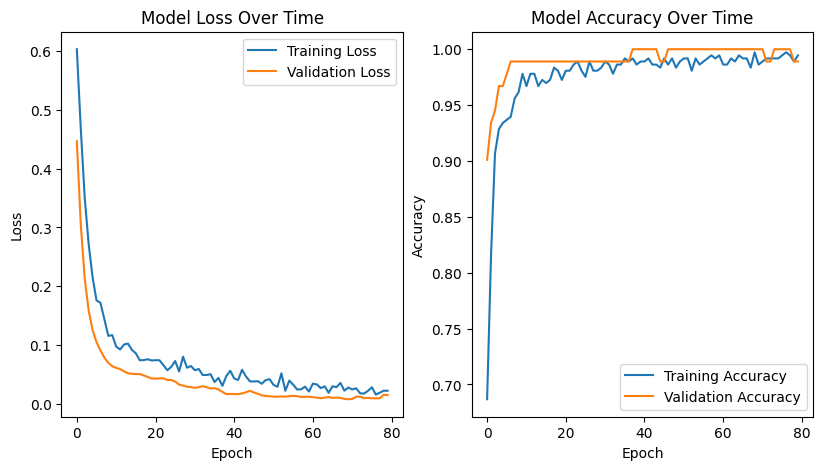

In [10]:
# 7. VISUALIZE TRAINING PROGRESS
# ===============================
print("7. Visualizing training progress...")
plt.figure(figsize=(15, 5))

# Plot training history
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [11]:
# 8. MAKE PREDICTIONS
# ===================
print("\n8. Making predictions on test set...")
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print(f"Predictions shape: {y_pred.shape}")
print(f"Sample predictions (first 10): {y_pred[:10]}")
print(f"Sample probabilities (first 10): {y_pred_prob.flatten()[:10]}")


8. Making predictions on test set...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Predictions shape: (114,)
Sample predictions (first 10): [0 1 0 0 0 1 1 0 0 0]
Sample probabilities (first 10): [4.0635974e-16 1.0000000e+00 1.1932725e-05 6.8201087e-02 1.2897674e-18
 9.9982321e-01 9.9999982e-01 9.3465993e-14 1.3704413e-10 2.0711807e-23]



9. Evaluating model performance...
=== PERFORMANCE METRICS ===
Accuracy:  0.9649
Precision: 0.9857
Recall:    0.9583
F1-Score:  0.9718

Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.98      0.95        42
      benign       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114


Confusion Matrix:
[[41  1]
 [ 3 69]]


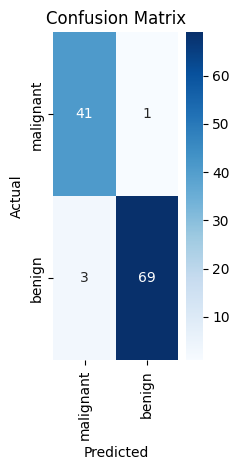

In [12]:
# 9. EVALUATE THE MODEL
# =====================
print("\n9. Evaluating model performance...")

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== PERFORMANCE METRICS ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


=== PERFORMANCE ANALYSIS ===
True Negatives:  41
False Positives: 1
False Negatives: 3
True Positives:  69
Sensitivity (Recall): 0.9583
Specificity: 0.9762

10. Analyzing feature importance...


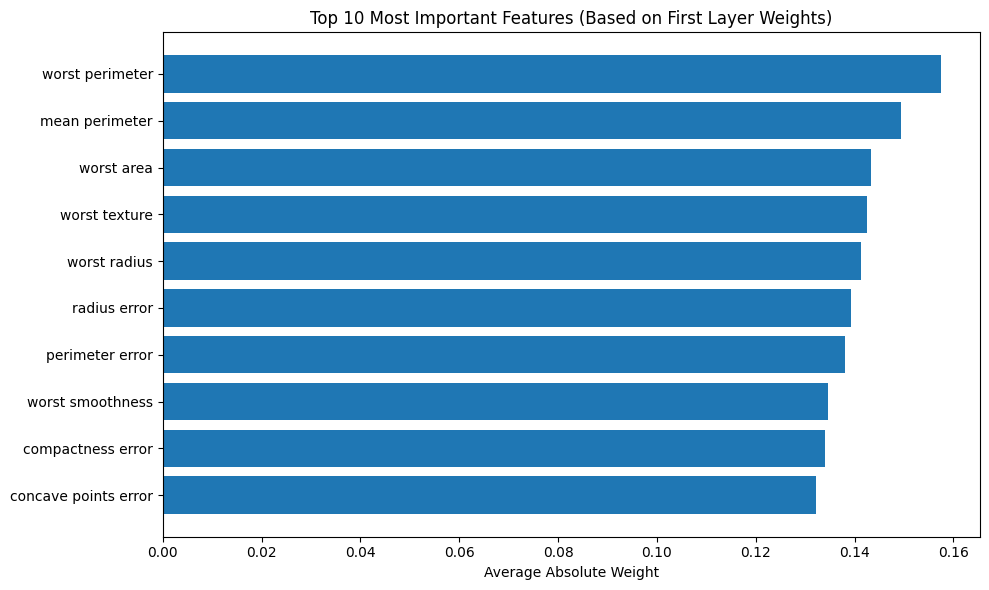

Analysis complete! The model has been trained and evaluated successfully.

Key Insights:
- Model achieved 96.5% accuracy on test set
- High precision (98.6%) means few false positives
- High recall (95.8%) means few false negatives
- The model appears to generalize well to unseen data


In [13]:
# 10. PERFORMANCE ANALYSIS
# ========================
print("\n=== PERFORMANCE ANALYSIS ===")

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)  # Same as recall

print(f"True Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives:  {tp}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Feature importance visualization (using weights from first layer)
print("\n10. Analyzing feature importance...")
first_layer_weights = model.layers[0].get_weights()[0]
feature_importance = np.abs(first_layer_weights).mean(axis=1)

# Get top 10 most important features
top_features_idx = np.argsort(feature_importance)[-10:]
top_features_names = [data.feature_names[i] for i in top_features_idx]
top_features_importance = feature_importance[top_features_idx]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_names)), top_features_importance)
plt.yticks(range(len(top_features_names)), top_features_names)
plt.xlabel('Average Absolute Weight')
plt.title('Top 10 Most Important Features (Based on First Layer Weights)')
plt.tight_layout()
plt.show()

print("Analysis complete! The model has been trained and evaluated successfully.")
print("\nKey Insights:")
print(f"- Model achieved {accuracy:.1%} accuracy on test set")
print(f"- High precision ({precision:.1%}) means few false positives")
print(f"- High recall ({recall:.1%}) means few false negatives")
print("- The model appears to generalize well to unseen data")


In [14]:
# 11. SAVE THE MODEL
# ==================
print("\n11. Saving the trained model...")
model.save('breast_cancer_nn_model.h5')
print("Model saved as 'breast_cancer_nn_model.h5'")
print("You can load it later using: model = keras.models.load_model('breast_cancer_nn_model.h5')")

print("\n=== PROJECT COMPLETE ===")
print("This neural network successfully classifies breast cancer tumors")
print("with high accuracy using 30 extracted features from medical images.")


11. Saving the trained model...
Model saved as 'breast_cancer_nn_model.h5'
You can load it later using: model = keras.models.load_model('breast_cancer_nn_model.h5')

=== PROJECT COMPLETE ===
This neural network successfully classifies breast cancer tumors
with high accuracy using 30 extracted features from medical images.
